In [0]:
import tensorflow as tf

In [2]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
train_images=train_images.reshape(60000,28,28,1)  #first convolution expects a single tensor containing everything, so a single 4D list 
train_images=train_images / 255.0                 #that is 60,000x28x28x1, instead of 60,000 28x28x1 items in a list
test_images=test_images.reshape(10000,28,28,1)
test_images=test_images / 255.0

In [0]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu', input_shape=(28,28,1)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128,activation='relu'),
                                  tf.keras.layers.Dense(10,activation='softmax'),
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')
model.fit(train_images,train_labels,epochs=5)

test_loss=model.evaluate(test_images,test_labels)

Epoch 1/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.4406
Epoch 2/5
1875/1875 [==============================] - 80s 42ms/step - loss: 0.2895
Epoch 3/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2424
Epoch 4/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.2089
Epoch 5/5
313/313 [==============================] - 4s 13ms/step - loss: 0.2510


Visualization 

In [0]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


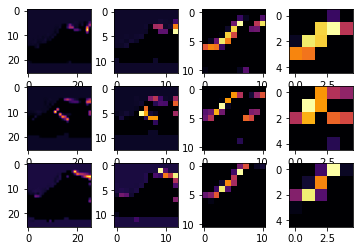

In [13]:
import matplotlib.pyplot as plt
f,axarr=plt.subplots(3,4)
first_image=0
second_image=23
third_image=28
conv_no=1
from tensorflow.keras import models
layer_outputs=[layer.output for layer in model.layers]
activation_model=tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

for x in range(0,4):
  f1=activation_model.predict(test_images[first_image].reshape(1,28,28,1))[x]
  axarr[0,x].imshow(f1[0,:,:,conv_no],cmap='inferno')
  axarr[0,x].grid= False
  f2=activation_model.predict(test_images[second_image].reshape(1,28,28,1))[x]
  axarr[1,x].imshow(f2[0,:,:,conv_no],cmap='inferno')
  axarr[1,x].grid= False
  f3=activation_model.predict(test_images[third_image].reshape(1,28,28,1))[x]
  axarr[2,x].imshow(f3[0,:,:,conv_no],cmap='inferno')
  axarr[2,x].grid= False


EXERCISES

1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

2. Remove the final Convolution. What impact will this have on accuracy or training time?

3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.

4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it. 

5. In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!

In [15]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.9960):
      print("\n Accuracy is goodso cancelling training")
      self.model.stop_training = True
import tensorflow as tf
print(tf.__version__)
callbacks=myCallback()
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10,callbacks=[callbacks])
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.2.0
Epoch 1/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1351 - accuracy: 0.9599
Epoch 2/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0461 - accuracy: 0.9857
Epoch 3/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0280 - accuracy: 0.9911
Epoch 4/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0172 - accuracy: 0.9943
Epoch 5/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0116 - accuracy: 0.9964
 Accuracy is goodso cancelling training
313/313 [==============================] - 3s 8ms/step - loss: 0.0565 - accuracy: 0.9838
0.9837999939918518
